In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names=["T-shirts/top","trousers","Pullovers","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [5]:
# Data reshaping is to be done in CNN and was not done in ANN.
# In ANN , we had first 'flatten' our dataset but here we will convert our 2D dataset into 3D dataset by adding 'channnel' or 'feature map' as a dimension.

In [6]:
X_train_full=X_train_full.reshape((60000,28,28,1))  # 60000 images are in training dataset
X_test=X_test.reshape((10000,28,28,1))              # 10000 images are in testing dataset

In [7]:
# Data Normalization
X_train_n=X_train_full/255.
X_test_n=X_test/255.

In [8]:
#dividing data into train,test and validation
X_valid,X_train=X_train_n[:5000],X_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test_n

In [9]:
#creating Model architecture

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
# CNN uses ANN. ANN will be added after CNN layers.

In [12]:
# number of 'filters' is equal to number of 'feature maps' or 'channels' as each 'filter' gives rise to one feature map. This will give height to a convolutionary layer.

In [13]:
model= keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
# filter means feature maps or channels. So, these filters give height to a 'convolutionary layer'.
# kernel_size means filter size.
# Activation function will always be 'Rectified Linear Unit(ReLU)' in CNN.
# In input_shape=(28,28,1) ; '1' is number of 'channel' / 'feature-map' / 'filter' .In a coloured picture, this number will be 3.
# model.add(keras.layers.MaxPooling2D((2,2)))
# Pooling layer is used so, as to reduce time , number of computations ,load on system (pc, laptop etc) etc .Pooling layers do not overlap.
# So, receptive field is of 2 x 2. As pooling layer is a receptive field.

# ANN starts from here:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

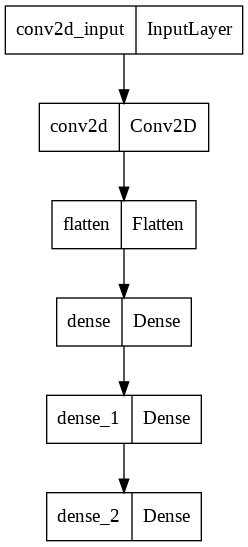

In [14]:
import pydot
keras.utils.plot_model(model)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 300)               6489900   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [16]:
# from summary , due to use of maxpooling our parameters are lesser otherwise, due to overlapp, number of parameters would have crossed 4 or 5 millions.

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

In [18]:
model_history=model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/10
860/860 [==============================] - 102s 117ms/step - loss: 0.7366 - accuracy: 0.7473 - val_loss: 0.6859 - val_accuracy: 0.7514
Epoch 2/10
860/860 [==============================] - 89s 104ms/step - loss: 0.4931 - accuracy: 0.8224 - val_loss: 0.4672 - val_accuracy: 0.8264
Epoch 3/10
860/860 [==============================] - 88s 103ms/step - loss: 0.4421 - accuracy: 0.8393 - val_loss: 0.9879 - val_accuracy: 0.6970
Epoch 4/10
860/860 [==============================] - 89s 104ms/step - loss: 0.4098 - accuracy: 0.8527 - val_loss: 0.3941 - val_accuracy: 0.8580
Epoch 5/10
860/860 [==============================] - 87s 102ms/step - loss: 0.3893 - accuracy: 0.8598 - val_loss: 0.4047 - val_accuracy: 0.8532
Epoch 6/10
860/860 [==============================] - 88s 103ms/step - loss: 0.3685 - accuracy: 0.8661 - val_loss: 0.3554 - val_accuracy: 0.8728
Epoch 7/10
860/860 [==============================] - 89s 103ms/step - loss: 0.3545 - accuracy: 0.8706 - val_loss: 0.3945 - val_a

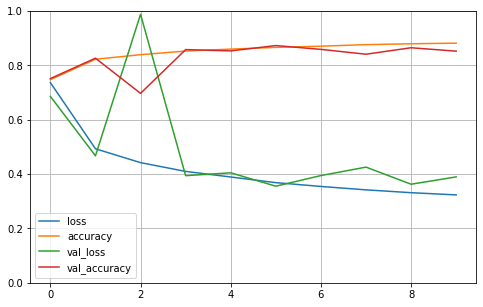

In [19]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
model.evaluate(X_test_n,y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.4326 - accuracy: 0.8416


[0.4325670301914215, 0.8416000008583069]

In [21]:
# first value is 'loss' and second is 'accuracy'.

In [22]:
X_new=X_test[:3]

In [23]:
y_pred=model.predict(X_new)

1/1 [==============================] - 0s 123ms/step


In [24]:
y_pred

array([[4.1504954e-06, 2.1247342e-07, 2.3979808e-07, 5.1715019e-06,
        1.3414425e-06, 1.1391501e-02, 3.9201499e-05, 3.4165136e-03,
        6.2866899e-04, 9.8451298e-01],
       [4.2131433e-05, 1.1314465e-08, 9.8904562e-01, 1.7091763e-06,
        5.1186152e-04, 1.6364234e-09, 1.0397879e-02, 8.8327262e-10,
        7.2487683e-07, 6.5943966e-09],
       [4.3253251e-05, 9.9991977e-01, 2.4871044e-06, 2.8062903e-05,
        4.2540150e-06, 3.7817302e-10, 1.8938674e-06, 2.5042394e-07,
        6.3409691e-09, 1.4058399e-08]], dtype=float32)

In [25]:
y_pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [27]:
# Comparing the above two outcomes, the predicted and test data match.

AxesImage(54,36;334.8x217.44)


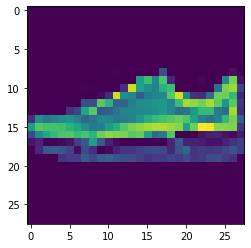

In [28]:
print(plt.imshow(X_test[9].reshape(28,28)))

AxesImage(54,36;334.8x217.44)


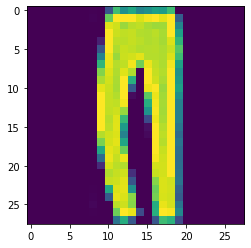

In [29]:
print(plt.imshow(X_test[2].reshape(28,28)))

AxesImage(54,36;334.8x217.44)


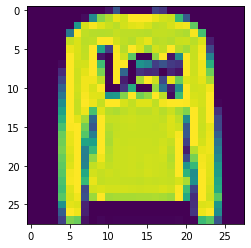

In [30]:
print(plt.imshow(X_test[1].reshape(28,28)))

In [31]:
# As compared to prediction of fashion MNIST data with pooling layer , prediction with no pooling layer takes more time but as there is overlapping, accuracy is more. 